In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
df=pd.read_csv("./datasets/Advertising.csv")
x=df.drop(columns=["Unnamed: 0","Sales"],axis=1)

In [12]:
y=df['Sales']

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
#cretaing an instance of polynomial feature
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)#degree=order to which wanna take the feature
#usually chose two and go up can plot and check also
#dont need bias value cuz going to run linear regression on it afterword
polynomial_converter.fit(x)

#DONT NEED TO SPLIT TO TRAINGIN AND TESTING CUZ IS NOT AN ML MODEL JUST A PREPROCESSING OF FEATURES
poly_features=polynomial_converter.transform(x)#will see the transformed objects

In [17]:
poly_features.shape

(200, 9)

In [18]:
x.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [19]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

first three same next three are squared terms and next are in interaction terms, creating new feature set will do train test spit on poly features

now do a train test split on the new transformed features
remember how many newspaper times tv advertising

In [20]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)#make sure doing tule unpacking in the correct order

In [21]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
test_predictions=model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
MAE=mean_absolute_error(y_test,test_predictions)
MAE

0.4896798044803721

In [29]:
MSE=mean_squared_error(y_test,test_predictions)

In [32]:
RMSE=np.sqrt(MSE)
RMSE

0.6646431757269214

In [33]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [34]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [37]:
x.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [38]:
#create the different order polynomial
#split poly feat train/test
#fit on train
#store/save the rmse for both the train and test
#wanna keep in mind the performance on test data
#bigger the value of d more computing time mostly for 3 features would never put degree=10

train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):
    polynomial_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=polynomial_converter.fit_transform(x)
    
    X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)
    model=LinearRegression()#makinf an instance of linear regression
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
    train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [39]:
train_rmse_errors#getting lower values but there are spikes as well

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.35170836883993606,
 0.25093429381786897,
 0.1945666472024403,
 5.423737279770718,
 0.14168056686637134,
 0.17093527228363956]

In [40]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269214,
 0.5803286825217238,
 0.5077742623175882,
 2.575837063490081,
 4.214027384734879,
 1374.9574048884183,
 4344.727850519797,
 93796.02671838581]

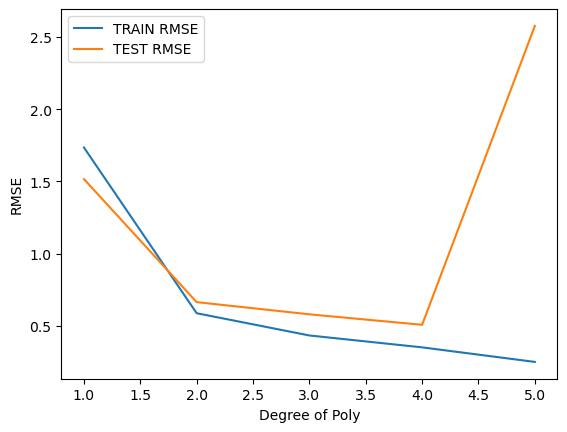

In [45]:
plt.plot(range(1,6),train_rmse_errors[:5],label="TRAIN RMSE")
plt.plot(range(1,6),test_rmse_errors[:5],label="TEST RMSE")

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

CAN see as start to fit higher degree polynomial even as decreases,
see how training data seems perfect fit, when plotting all 10
seeing 4 is a choice since min rmse there but should choose something like 2 or 3 so that not right next to that shooting up point

In [46]:
#chose 3rd order of polynomial
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)
final_model=LinearRegression()

In [47]:
fully_converted_X=final_poly_converter.fit_transform(x)
final_model.fit(fully_converted_X,y)

LinearRegression()

In [48]:
from joblib import dump,load

In [69]:
dump(final_model,'final_poly_model.joblib')#couldvw saved in any psition in computer

['final_poly_model.joblib']

In [70]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [71]:
loaded_converter=load('final_converter.joblib')

In [72]:
loaded_model=load('final_poly_model.joblib')#can directly load up model

In [73]:
campaign=[[149,22,12]]

In [74]:
transformed_data=loaded_converter.fit_transform(campaign)

In [75]:
loaded_model.predict(transformed_data)

array([14.64501014])

getting the prediction value the model was basically dumped for someone else to put in values to predict i think